### Import Packages

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import os.path as osp
import pickle
import scipy.misc
from image_generator import *

#### Load training dataset

In [2]:
from image_generator import get_images
from image_generator import get_train_val
#train_image_ids, val_image_ids = get_train_val()
#val_images = get_images(val_image_ids)
#train_images = get_images(train_image_ids)

In [5]:
from image_generator import load_train_images
train_images_waldo = load_train_images('training_set/waldo')
train_images_wenda = load_train_images('training_set/wenda')
train_images_wizard = load_train_images('training_set/wizard')
train_images_others = load_train_images('training_set/others')

In [6]:
training_set = []
training_set.extend(train_images_waldo)
training_set.extend(train_images_wenda)
training_set.extend(train_images_wizard)
training_set.extend(train_images_others)

In [7]:
train_labels = ['waldo'] * len(train_images_waldo)
train_labels.extend(['wenda'] * len(train_images_wenda))
train_labels.extend(['wizard'] * len(train_images_wizard))
train_labels.extend(['others'] * len(train_images_others))

In [8]:
val_images_waldo = load_train_images('validation_set/waldo')
val_images_wenda = load_train_images('validation_set/wenda')
val_images_wizard = load_train_images('validation_set/wizard')
val_images_others = load_train_images('validation_set/others')

In [9]:
val_images_all = []
val_images_all.extend(val_images_waldo)
val_images_all.extend(val_images_wenda)
val_images_all.extend(val_images_wizard)
val_images_all.extend(val_images_others)

In [10]:
val_labels = ['waldo'] * len(val_images_waldo)
val_labels.extend(['wenda'] * len(val_images_wenda))
val_labels.extend(['wizard'] * len(val_images_wizard))
val_labels.extend(['others'] * len(val_images_others))

In [11]:
def save(model, filename):
    with open("model/{0}.pkl".format(filename), 'wb') as f:
        pickle.dump(model, f)
        print('{:s} saved'.format(filename))

# SVM

## All

In [9]:
import time
from sklearn.svm import SVC

def show_svm_res(f, vocab_size, training_set_this, train_labels_this, val_labels_this, categories, ax):
    from image_generator import build_vocab
    vocab_filename = "vocab/{0}_{1}.pkl".format(f, vocab_size)
    if not osp.isfile(vocab_filename):
        print('No existing visual word vocabulary found. Computing one from training images')
        vocab = build_vocab(training_set_this, vocab_size)

        with open(vocab_filename, 'wb') as f:
            pickle.dump(vocab, f)
            print('{:s} saved'.format(vocab_filename))
        
    train_image_feats = bags_of_sifts_spm(training_set_this, vocab_filename, 3)
    svm = SVC(gamma="scale", decision_function_shape='ovo', probability=True, kernel="linear")
    svm.fit(train_image_feats, train_labels_this)
    
    start_time = time.time()
    val_image_feats = bags_of_sifts_spm(val_images_all, vocab_filename, 3)
    y_pred = svm.predict(val_image_feats)
    print(time.time()-start_time)
    
    show_results(val_labels_this, categories, y_pred, ax)
    return svm

In [1]:
from sklearn.ensemble import AdaBoostClassifier

def show_boost_res(f, vocab_size, training_set_this, train_labels_this, val_labels_this, categories, ax):
    from image_generator import build_vocab
    vocab_filename = "vocab/{0}_{1}.pkl".format(f, vocab_size)
    if not osp.isfile(vocab_filename):
        print('No existing visual word vocabulary found. Computing one from training images')
        vocab = build_vocab(training_set_this, vocab_size)

        with open(vocab_filename, 'wb') as f:
            pickle.dump(vocab, f)
            print('{:s} saved'.format(vocab_filename))
        
    train_image_feats = bags_of_sifts_spm(training_set_this, vocab_filename, 3)
    clf = AdaBoostClassifier(n_estimators=100, random_state=0)
    clf.fit(train_image_feats, train_labels_this)
    
    start_time = time.time()
    val_image_feats = bags_of_sifts_spm(val_images_all, vocab_filename, 3)
    y_pred = clf.predict(val_image_feats)
    print(time.time()-start_time)
    
    show_results(val_labels_this, categories, y_pred, ax, cmap=plt.cm.Greens)
    return clf

29.55587100982666
Average Accuracy: 62.44%
44.79677081108093
Average Accuracy: 55.97%
91.3922951221466
Average Accuracy: 44.67%


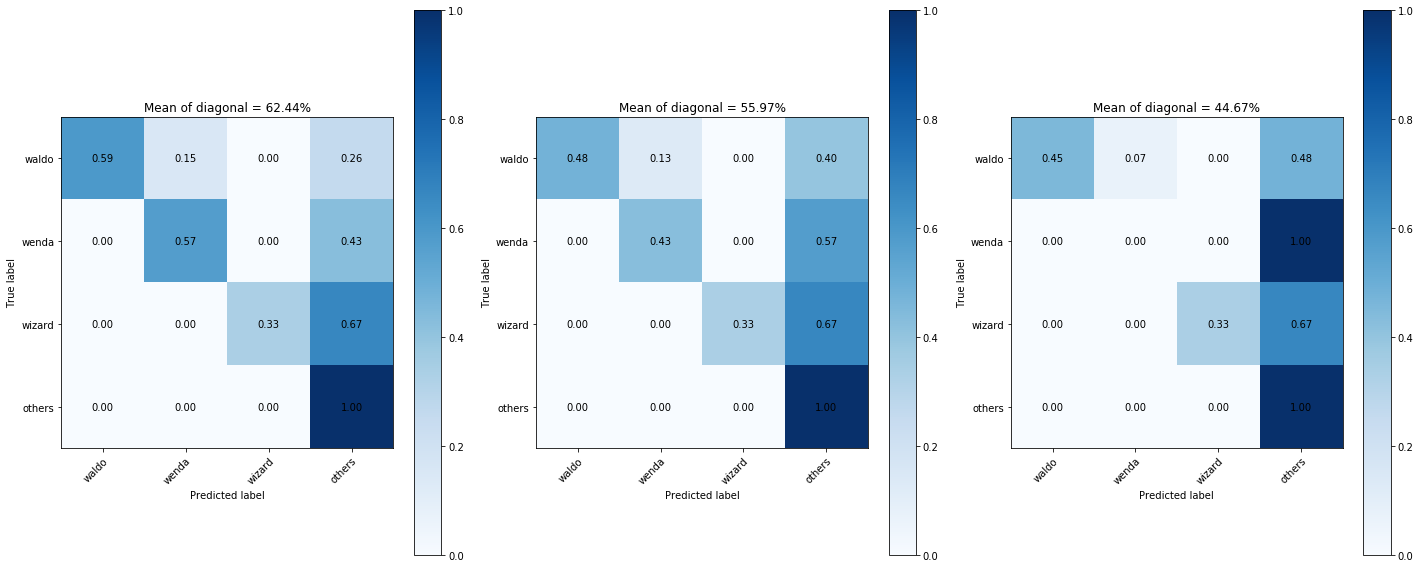

In [14]:
categories = ["waldo", "wenda", "wizard", "others"]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm1 = show_svm_res('vocab_50', 200, training_set, train_labels, val_labels, categories, ax1)
svm2 = show_svm_res('vocab_50', 500, training_set, train_labels, val_labels, categories, ax2)
svm3 = show_svm_res('vocab_50', 1000, training_set, train_labels, val_labels, categories, ax3)
fig.tight_layout()

62.8846709728241
Average Accuracy: 34.87%
130.01963806152344
Average Accuracy: 34.15%
265.3559408187866
Average Accuracy: 40.75%


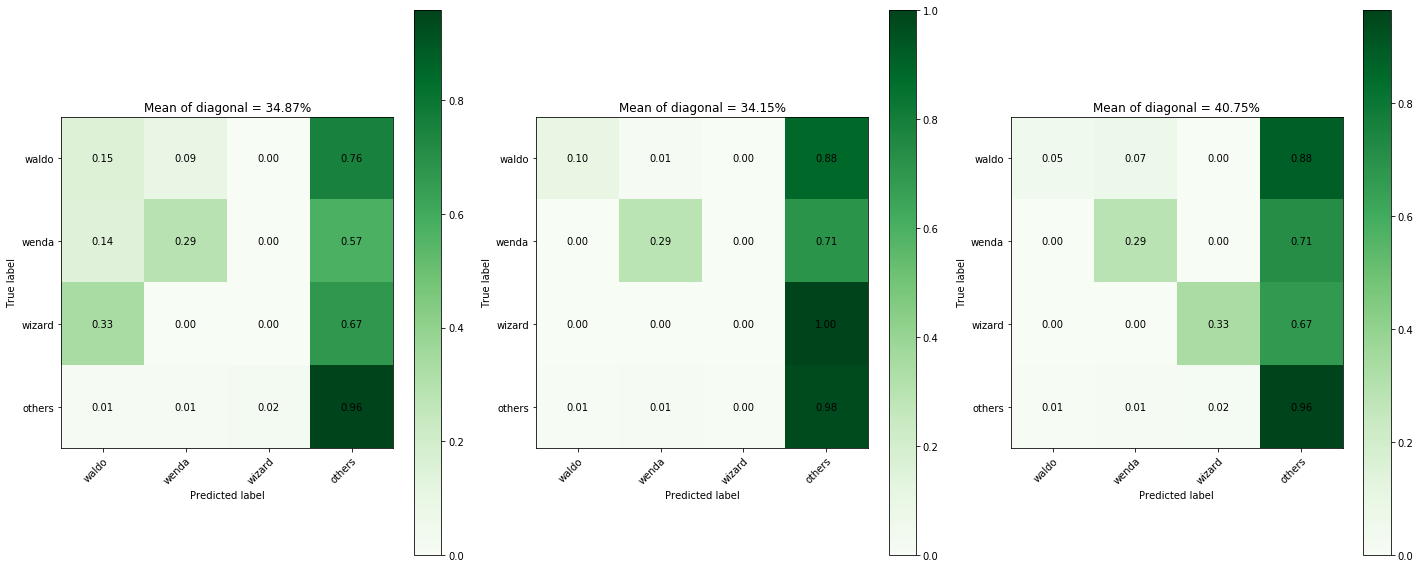

In [13]:
import time
categories = ["waldo", "wenda", "wizard", "others"]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
clf1 = show_boost_res('vocab_50', 200, training_set, train_labels, val_labels, categories, ax1)
clf2 = show_boost_res('vocab_50', 500, training_set, train_labels, val_labels, categories, ax2)
clf3 = show_boost_res('vocab_50', 1000, training_set, train_labels, val_labels, categories, ax3)
fig.tight_layout()

30.26608371734619
Average Accuracy: 62.44%
71.603431224823
Average Accuracy: 55.97%
86.40819191932678
Average Accuracy: 44.67%


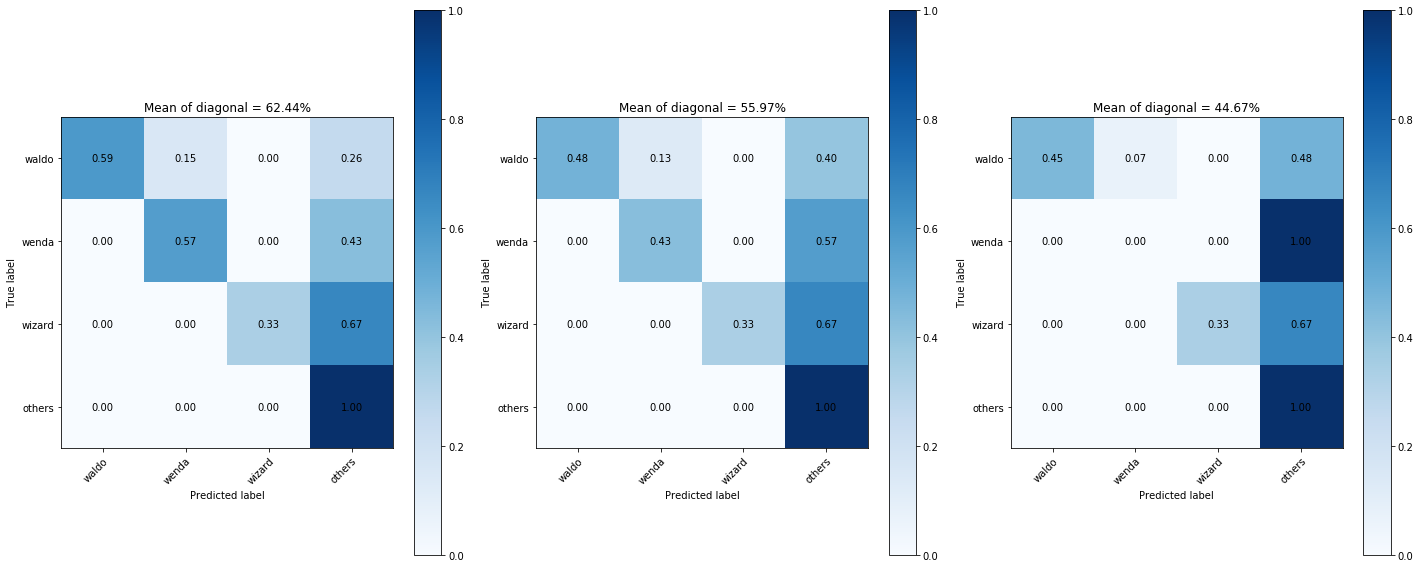

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm1 = show_svm_res('vocab_50', 200, training_set, train_labels, val_labels, categories, ax1)
svm2 = show_svm_res('vocab_50', 500, training_set, train_labels, val_labels, categories, ax2)
svm3 = show_svm_res('vocab_50', 1000, training_set, train_labels, val_labels, categories, ax3)
fig.tight_layout()

24.33425807952881
Average Accuracy: 67.18%
66.74676203727722
Average Accuracy: 54.72%
98.90187907218933
Average Accuracy: 42.03%


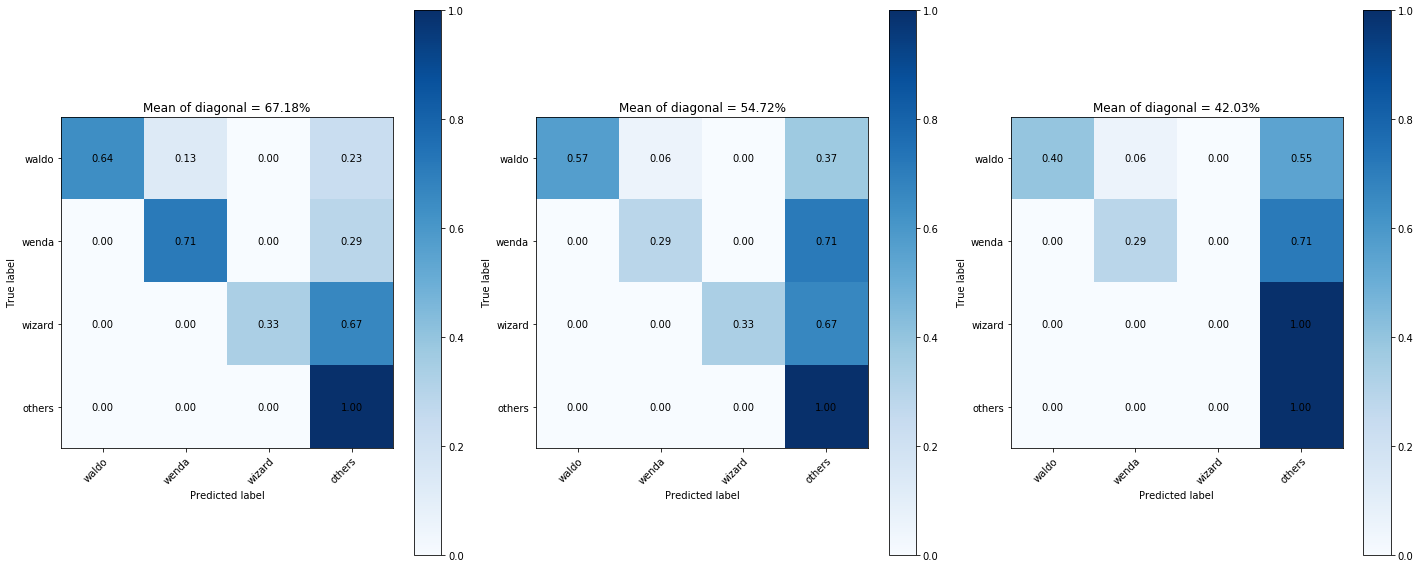

In [52]:
categories = ["waldo", "wenda", "wizard", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm4 = show_svm_res('vocab_100', 200, training_set, train_labels, val_labels, categories, ax1)
svm5 = show_svm_res('vocab_100', 500, training_set, train_labels, val_labels, categories, ax2)
svm6 = show_svm_res('vocab_100', 1000, training_set, train_labels, val_labels, categories, ax3)
fig.tight_layout()

In [54]:
save(svm4, "svm_100_200")

svm_100_200 saved


25.230046033859253
Average Accuracy: 66.56%
43.252156019210815
Average Accuracy: 57.67%
74.94324517250061
Average Accuracy: 49.49%


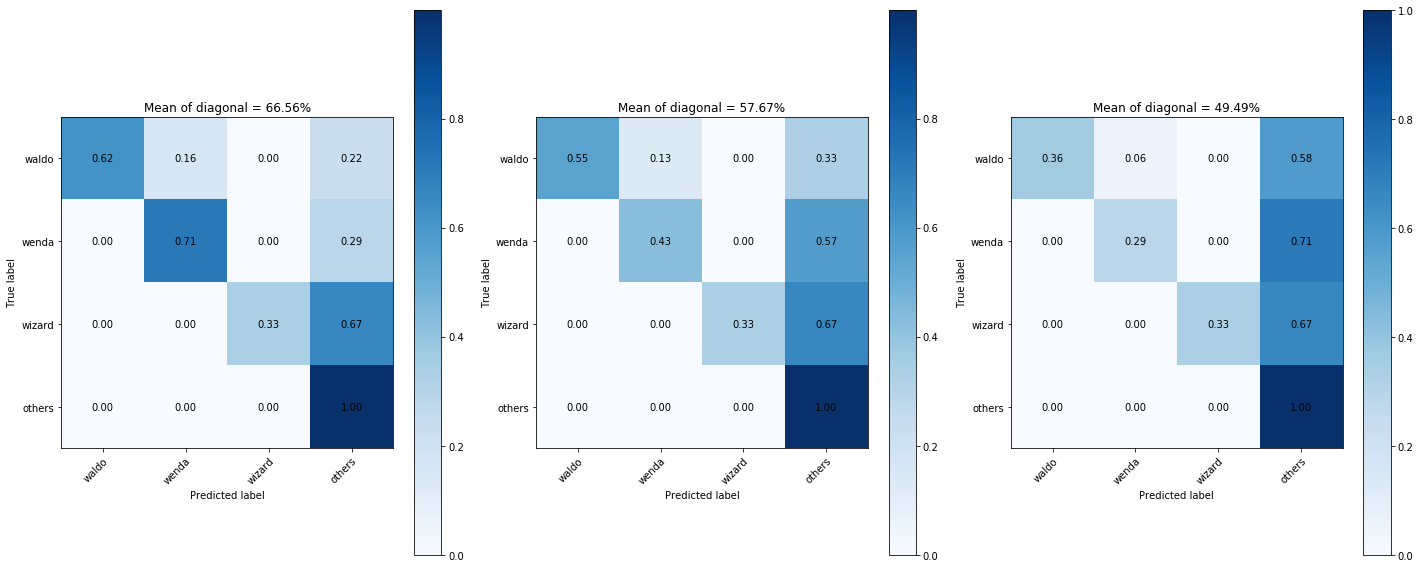

In [53]:
categories = ["waldo", "wenda", "wizard", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm7 = show_svm_res('vocab_600', 200, training_set, train_labels, val_labels, categories, ax1)
svm8 = show_svm_res('vocab_600', 500, training_set, train_labels, val_labels, categories, ax2)
svm9 = show_svm_res('vocab_600', 1000, training_set, train_labels, val_labels, categories, ax3)
fig.tight_layout()

In [50]:
training_set_balance = []
training_set_balance.extend(train_images_waldo)
training_set_balance.extend(train_images_wenda)
training_set_balance.extend(train_images_wizard)
training_set_balance.extend(train_images_others[:50])

train_labels_balance = ['waldo'] * len(train_images_waldo)
train_labels_balance.extend(['wenda'] * len(train_images_wenda))
train_labels_balance.extend(['wizard'] * len(train_images_wizard))
train_labels_balance.extend(['others'] * 50)

27.250943422317505
Average Accuracy: 59.12%
45.05539298057556
Average Accuracy: 54.50%
82.1509599685669
Average Accuracy: 50.58%


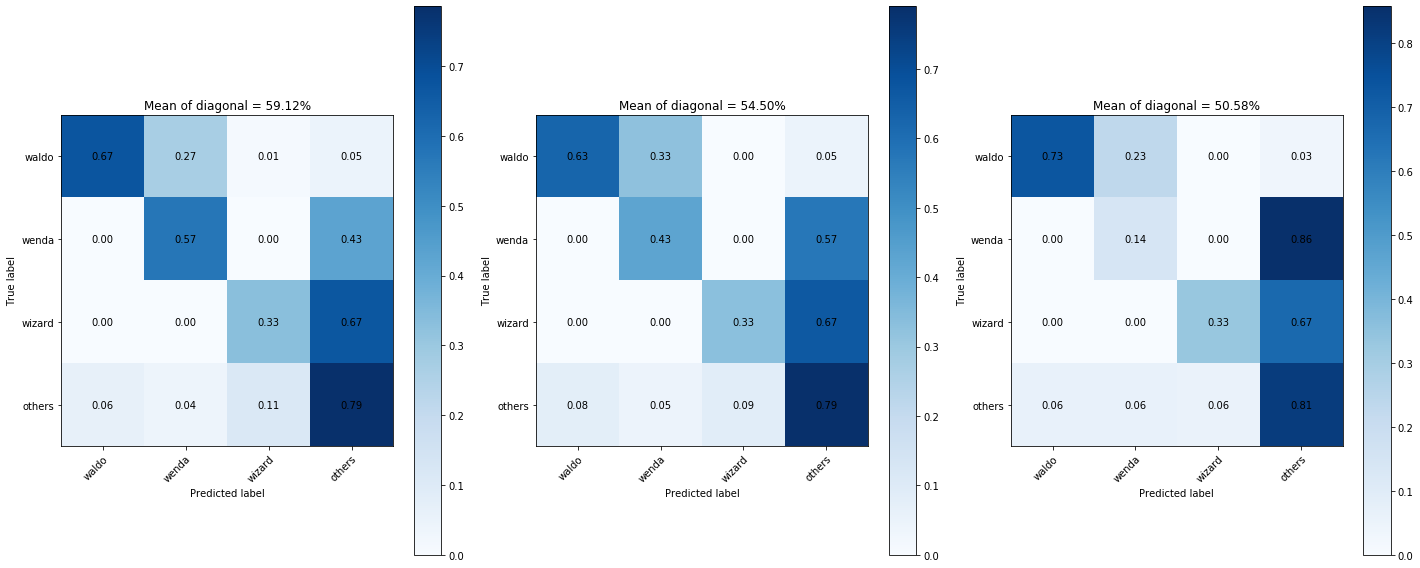

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svmb1 = show_svm_res('vocab_50', 200, training_set_balance, train_labels_balance, val_labels, categories, ax1)
svmb2 = show_svm_res('vocab_50', 500, training_set_balance, train_labels_balance, val_labels, categories, ax2)
svmb3 = show_svm_res('vocab_50', 1000, training_set_balance, train_labels_balance, val_labels, categories, ax3)
fig.tight_layout()

## Waldo

In [15]:
val_labels_waldo = ['waldo'] * len(val_images_waldo)
val_labels_waldo.extend(['others'] * len(val_images_wenda))
val_labels_waldo.extend(['others'] * len(val_images_wizard))
val_labels_waldo.extend(['others'] * len(val_images_others))

train_labels_waldo = ['waldo'] * len(train_images_waldo)
train_labels_waldo.extend(['others'] * len(train_images_waldo))

training_set_waldo = []
training_set_waldo.extend(train_images_waldo)
training_set_others_waldo = []
training_set_others_waldo.extend(train_images_wenda)
training_set_others_waldo.extend(train_images_wizard)
training_set_others_waldo.extend(train_images_others)
training_set_waldo.extend(np.random.choice(training_set_others_waldo, len(train_images_waldo)))


19.755342960357666
Average Accuracy: 93.65%
40.52837514877319
Average Accuracy: 92.23%
76.76097202301025
Average Accuracy: 91.17%


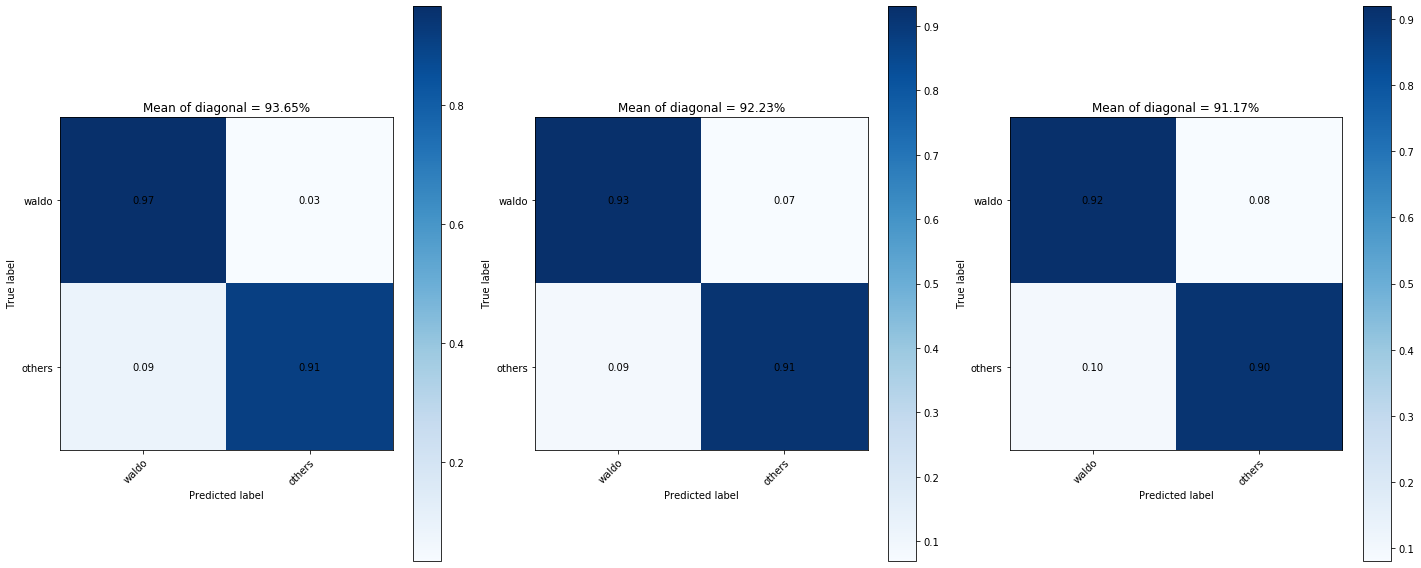

In [11]:
categories_waldo = ["waldo", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm_waldo1 = show_svm_res('vocab_waldo', 200, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax1)
svm_waldo2 = show_svm_res('vocab_waldo', 500, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax2)
svm_waldo3 = show_svm_res('vocab_waldo', 1000, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax3)
fig.tight_layout()

36.54170608520508
Average Accuracy: 87.76%
112.21474599838257
Average Accuracy: 88.31%
205.06908988952637
Average Accuracy: 79.20%


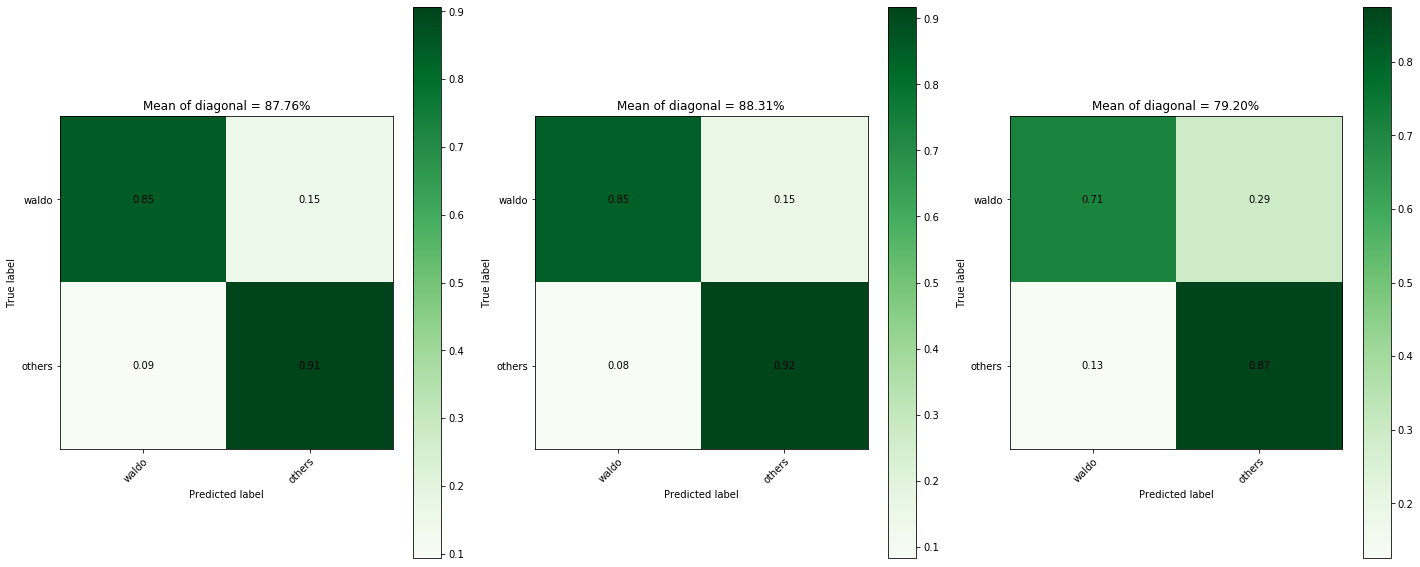

In [16]:
categories_waldo = ["waldo", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
clf_waldo1 = show_boost_res('vocab_waldo', 200, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax1)
clf_waldo2 = show_boost_res('vocab_waldo', 500, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax2)
clf_waldo3 = show_boost_res('vocab_waldo', 1000, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax3)
fig.tight_layout()

81.03200101852417
Average Accuracy: 88.69%
93.35627508163452
Average Accuracy: 85.35%
204.50082898139954
Average Accuracy: 81.42%


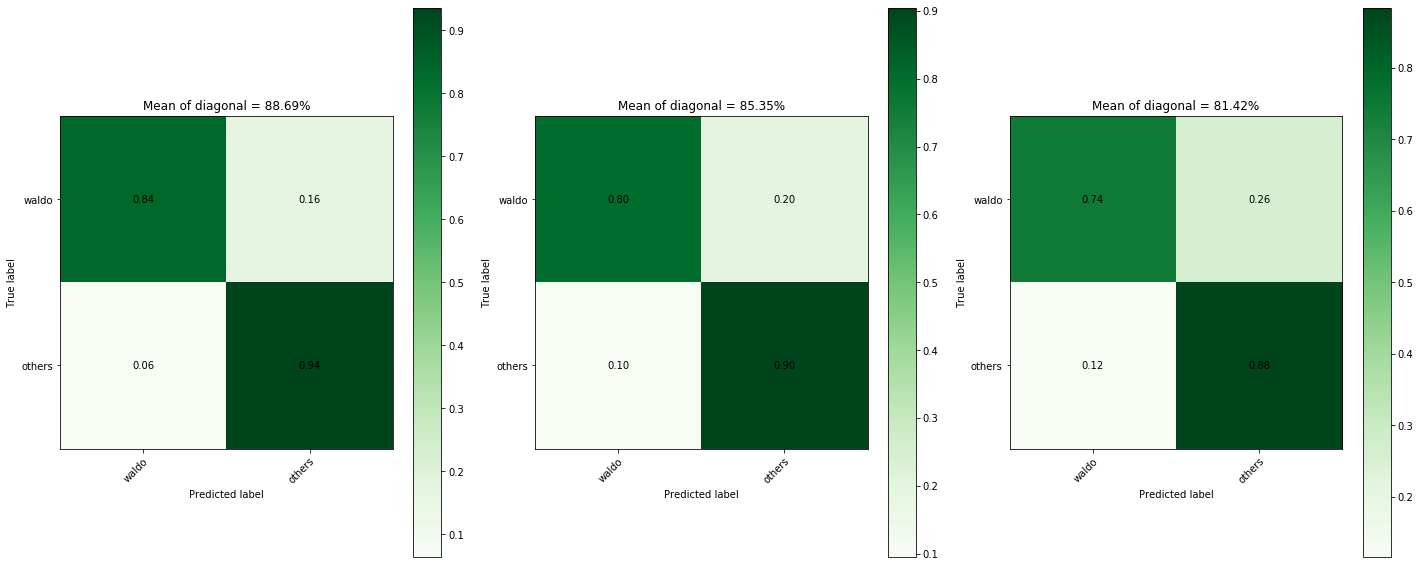

In [17]:
categories_waldo = ["waldo", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
clf_waldo4 = show_boost_res('vocab_waldo_600', 200, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax1)
clf_waldo5 = show_boost_res('vocab_waldo_600', 500, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax2)
clf_waldo6 = show_boost_res('vocab_waldo_600', 1000, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax3)
fig.tight_layout()

No existing visual word vocabulary found. Computing one from training images
vocab/vocab_waldo_600_200.pkl saved
21.33492875099182
Average Accuracy: 92.36%
No existing visual word vocabulary found. Computing one from training images
vocab/vocab_waldo_600_500.pkl saved
42.92971396446228
Average Accuracy: 93.55%
No existing visual word vocabulary found. Computing one from training images
vocab/vocab_waldo_600_1000.pkl saved
84.67002391815186
Average Accuracy: 88.10%


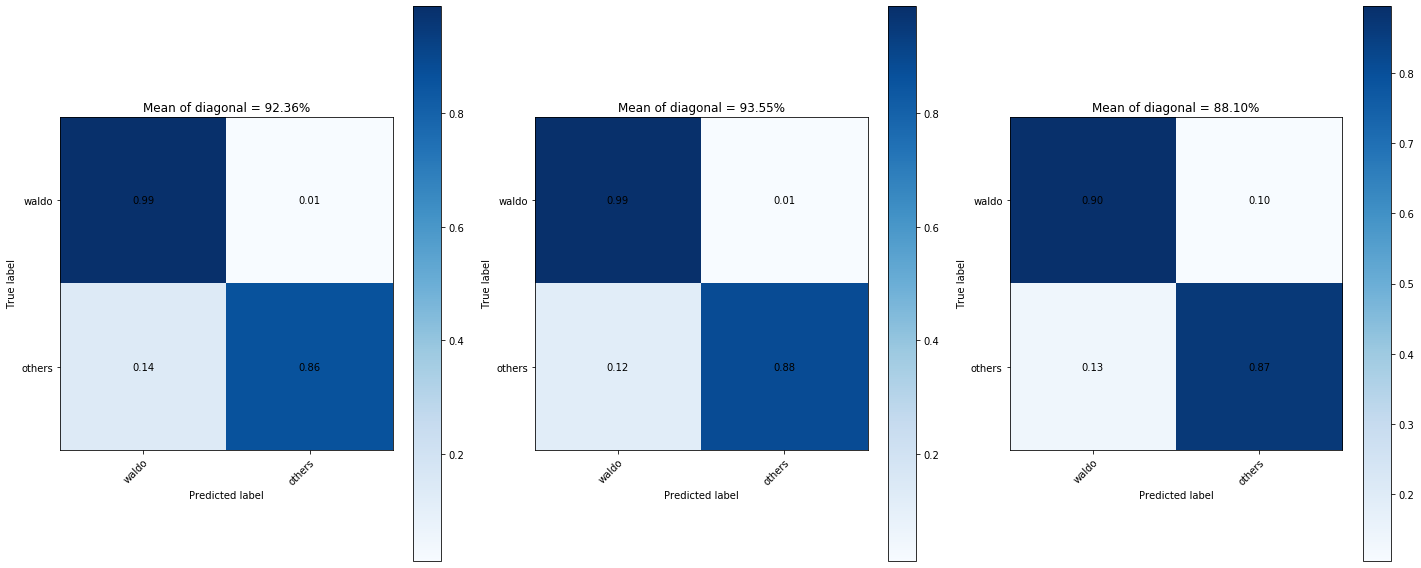

In [16]:
categories_waldo = ["waldo", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm_waldo1 = show_svm_res('vocab_waldo_600', 200, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax1)
svm_waldo2 = show_svm_res('vocab_waldo_600', 500, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax2)
svm_waldo3 = show_svm_res('vocab_waldo_600', 1000, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax3)
fig.tight_layout()

In [49]:
save(svm_waldo2, "waldo_600")

waldo_600 saved


### Wenda

27.987530946731567
Average Accuracy: 86.72%
55.913636922836304
Average Accuracy: 88.20%
97.7415988445282
Average Accuracy: 86.58%


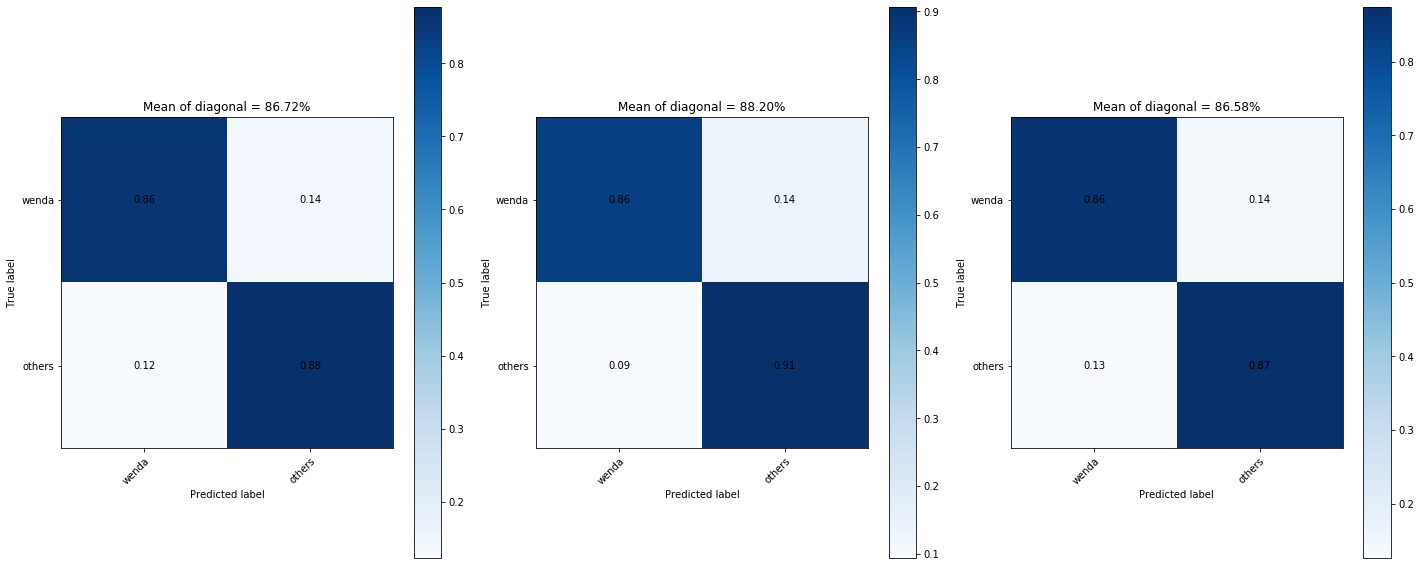

In [12]:
val_labels_wenda = ['others'] * len(val_images_waldo)
val_labels_wenda.extend(['wenda'] * len(val_images_wenda))
val_labels_wenda.extend(['others'] * len(val_images_wizard))
val_labels_wenda.extend(['others'] * len(val_images_others))

train_labels_wenda = ['wenda'] * len(train_images_wenda)
train_labels_wenda.extend(['others'] * len(train_images_wenda))

training_set_wenda = []
training_set_wenda.extend(train_images_wenda)
training_set_others_wenda = []
training_set_others_wenda.extend(train_images_waldo)
training_set_others_wenda.extend(train_images_wizard)
training_set_others_wenda.extend(train_images_others)
training_set_wenda.extend(np.random.choice(training_set_others_wenda, len(train_images_wenda)))

categories_wenda = ["wenda", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm_wenda1 = show_svm_res('vocab_wenda', 200, training_set_wenda, train_labels_wenda, val_labels_wenda, categories_wenda, ax1)
svm_wenda2 = show_svm_res('vocab_wenda', 500, training_set_wenda, train_labels_wenda, val_labels_wenda, categories_wenda, ax2)
svm_wenda3 = show_svm_res('vocab_wenda', 1000, training_set_wenda, train_labels_wenda, val_labels_wenda, categories_wenda, ax3)
fig.tight_layout()

No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wenda_600_200.pkl saved
24.91189980506897
Average Accuracy: 80.21%
No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wenda_600_500.pkl saved
44.346561908721924
Average Accuracy: 87.29%
No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wenda_600_1000.pkl saved
92.169349193573
Average Accuracy: 80.78%


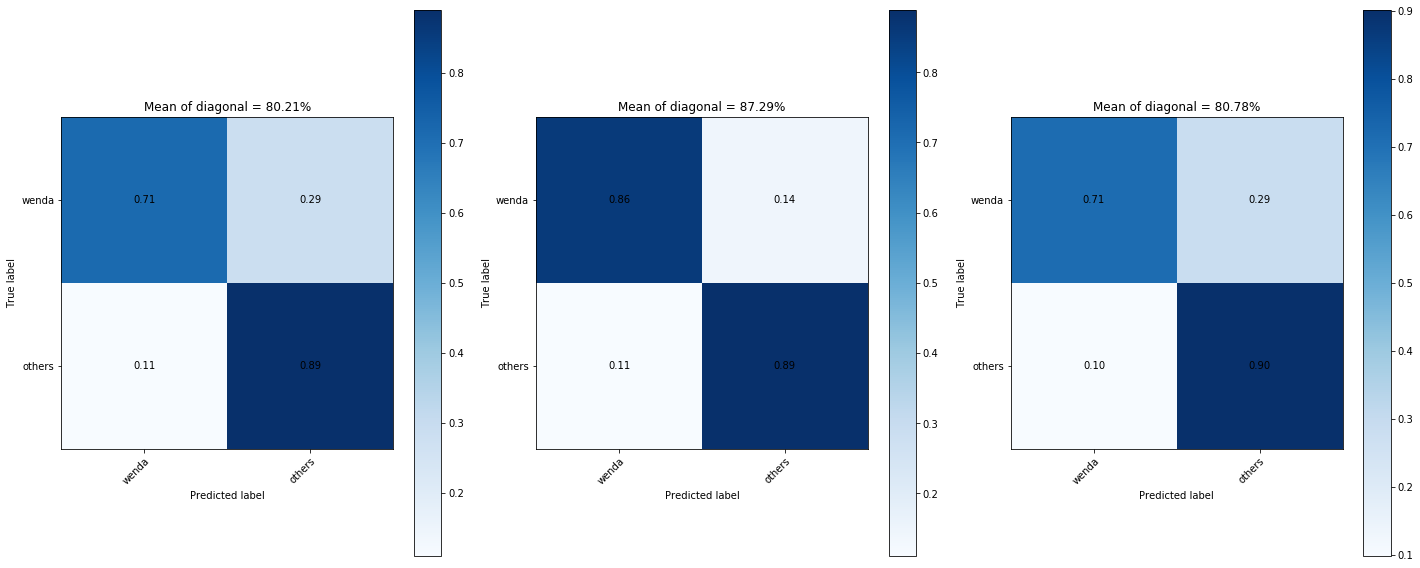

In [17]:
categories_wenda = ["wenda", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm_wenda4 = show_svm_res('vocab_wenda_600', 200, training_set_wenda, train_labels_wenda, val_labels_wenda, categories_wenda, ax1)
svm_wenda5 = show_svm_res('vocab_wenda_600', 500, training_set_wenda, train_labels_wenda, val_labels_wenda, categories_wenda, ax2)
svm_wenda6 = show_svm_res('vocab_wenda_600', 1000, training_set_wenda, train_labels_wenda, val_labels_wenda, categories_wenda, ax3)
fig.tight_layout()

### Wizard

26.332280158996582
Average Accuracy: 77.23%
64.9827811717987
Average Accuracy: 63.93%
114.54360795021057
Average Accuracy: 64.35%


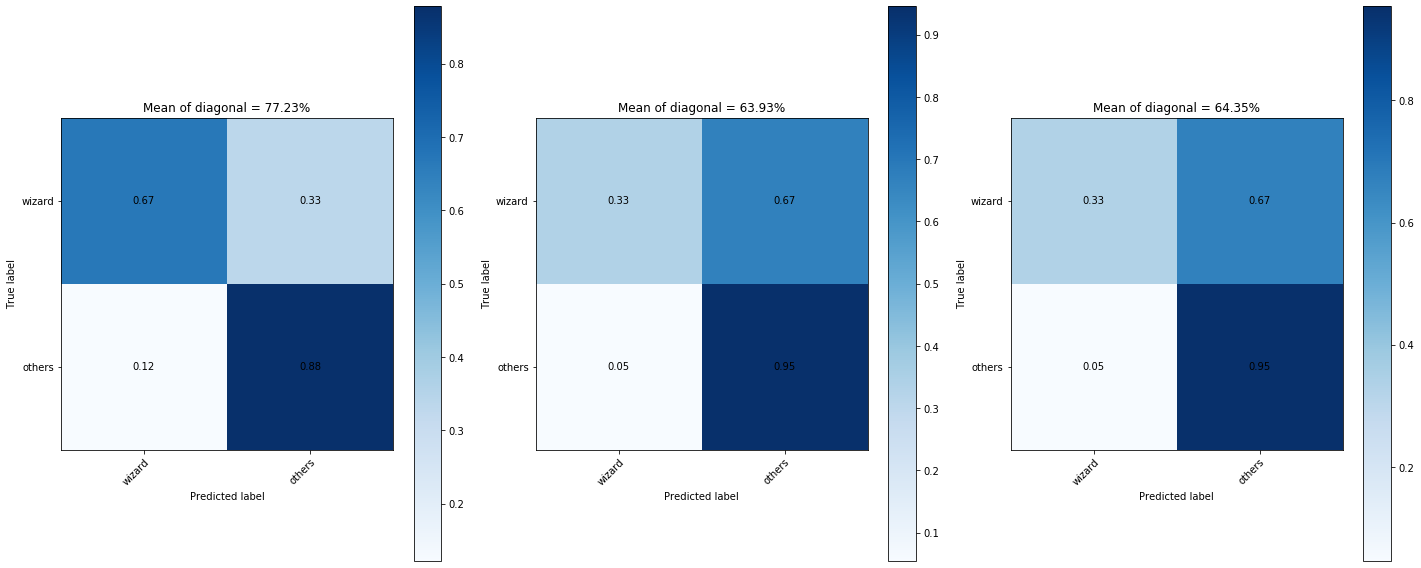

In [13]:
val_labels_wizard = ['others'] * len(val_images_waldo)
val_labels_wizard.extend(['others'] * len(val_images_wenda))
val_labels_wizard.extend(['wizard'] * len(val_images_wizard))
val_labels_wizard.extend(['others'] * len(val_images_others))

train_labels_wizard = ['wizard'] * len(train_images_wizard)
train_labels_wizard.extend(['others'] * len(train_images_wizard))

training_set_wizard = []
training_set_wizard.extend(train_images_wizard)
training_set_others_wizard = []
training_set_others_wizard.extend(train_images_waldo)
training_set_others_wizard.extend(train_images_wenda)
training_set_others_wizard.extend(train_images_others)
training_set_wizard.extend(np.random.choice(training_set_others_wizard, len(train_images_wizard)))

categories_wizard = ["wizard", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm_wizard1 = show_svm_res('vocab_wizard', 200, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax1)
svm_wizard2 = show_svm_res('vocab_wizard', 500, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax2)
svm_wizard3 = show_svm_res('vocab_wizard', 1000, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax3)
fig.tight_layout()

No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wizard_600_200.pkl saved
22.73347496986389
Average Accuracy: 78.35%
No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wizard_600_500.pkl saved
39.17876887321472
Average Accuracy: 61.97%
No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wizard_600_1000.pkl saved
76.90537905693054
Average Accuracy: 64.14%


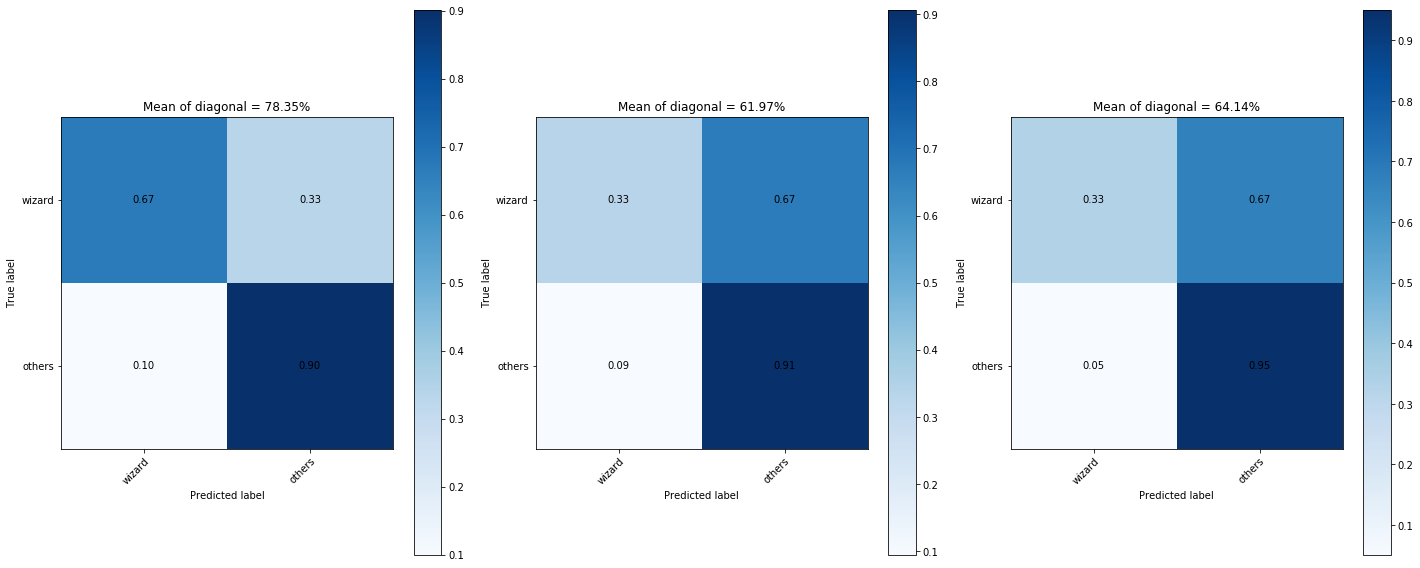

In [18]:
categories_wizard = ["wizard", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm_wizard4 = show_svm_res('vocab_wizard_600', 200, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax1)
svm_wizard5 = show_svm_res('vocab_wizard_600', 500, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax2)
svm_wizard6 = show_svm_res('vocab_wizard_600', 1000, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax3)
fig.tight_layout()

**FP is too high**, considering there are much more 'others' validation data inside.

### Hog

In [19]:
import argparse
import imutils
import cv2
from skimage import exposure
from skimage import feature
from imutils import paths

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

from skimage.feature import hog
from skimage import data, exposure


def train_hog(X, y):
    data = []
    labels = []

    for label, gray in zip(y, X):
        gray = cv2.resize(gray, (100, 100))

        H = feature.hog(gray, orientations=9, pixels_per_cell=(10, 10),
            cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys")

        data.append(H)
        labels.append(label)
    
    print("[INFO] training classifier...")
    model = SVC(gamma="scale", decision_function_shape='ovo', probability=True, kernel="linear")
    model.fit(data, labels)
    print("[INFO] evaluating...")
    return model

In [29]:
import time
from image_generator import show_results

def show_hog_res(val_labels_this, model, ax, categories=["waldo", "wenda", "wizard", "others"]):
    preds = []
    for img in val_images_all:
        new_candidate = cv2.resize(img, (100, 100))
        (H, hogImage) = feature.hog(new_candidate, orientations=9, pixels_per_cell=(10, 10),
                                    cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2-Hys", visualize=True)
        pred = model.predict(H.reshape(1, -1))[0]
        preds.append(pred)
    
    show_results(val_labels_this, categories, preds, ax)

## Hog with 50:45:44:46

In [33]:
training_set_hog = []
training_set_hog.extend(train_images_waldo)
training_set_hog.extend(train_images_wenda)
training_set_hog.extend(train_images_wizard)
training_set_hog.extend(train_images_others[:50])

train_labels_hog = ['waldo'] * len(train_images_waldo)
train_labels_hog.extend(['wenda'] * len(train_images_wenda))
train_labels_hog.extend(['wizard'] * len(train_images_wizard))
train_labels_hog.extend(['others'] * 50)

In [57]:
hog_balanced_4 = train_hog(training_set_hog, train_labels_hog)

[INFO] training classifier...
[INFO] evaluating...


Average Accuracy: 83.59%


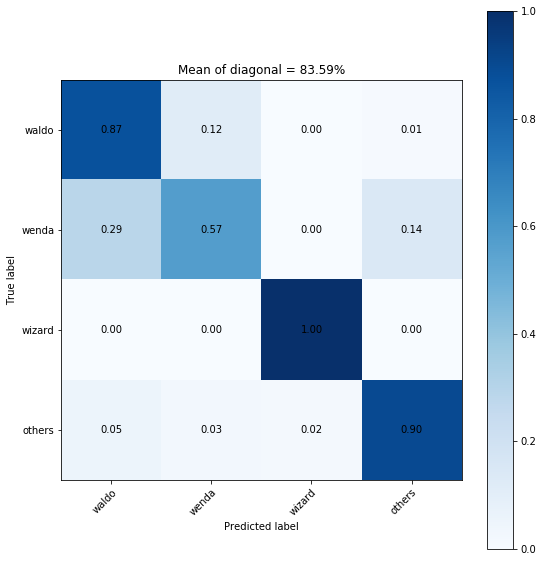

In [58]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
show_hog_res(val_labels, hog_balanced_4, ax)
fig.tight_layout()

In [59]:
save(hog_balanced_4, "hog_balanced_4")

hog_balanced_4 saved


## Hog 600:45:44:46

Average Accuracy: 84.72%


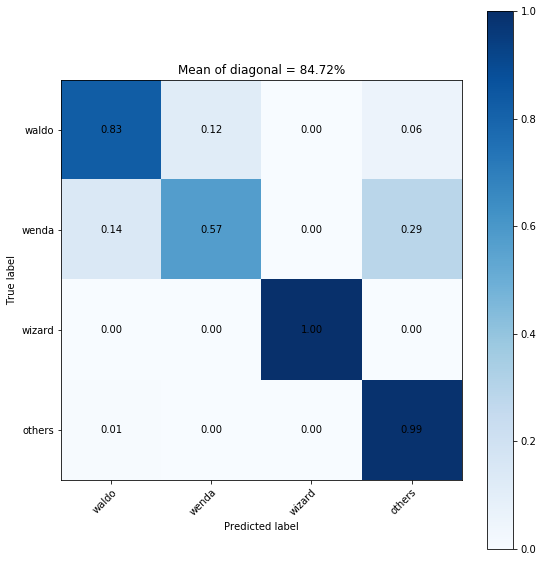

In [61]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
show_hog_res(val_labels, model, ax)
fig.tight_layout()

In [60]:
save(model, "hog_imbalanced_4")

hog_imbalanced_4 saved


## Hog 150:150

In [41]:
training_set_hog2 = []
training_set_hog2.extend(train_images_waldo)
training_set_hog2.extend(train_images_wenda)
training_set_hog2.extend(train_images_wizard)
training_set_hog2.extend(train_images_others[:150])

train_labels_hog2 = ['known'] * (len(train_images_waldo) + len(train_images_wenda) + len(train_images_wizard))
train_labels_hog2.extend(['others'] * 150)

val_labels_hog2 = ['known'] * (len(val_images_waldo) + len(val_images_wenda) + len(val_images_wizard))
val_labels_hog2.extend(['others'] * len(val_images_others))

In [39]:
hog_balanced = train_hog(training_set_hog2, train_labels_hog2)

[INFO] training classifier...
[INFO] evaluating...


Average Accuracy: 95.49%


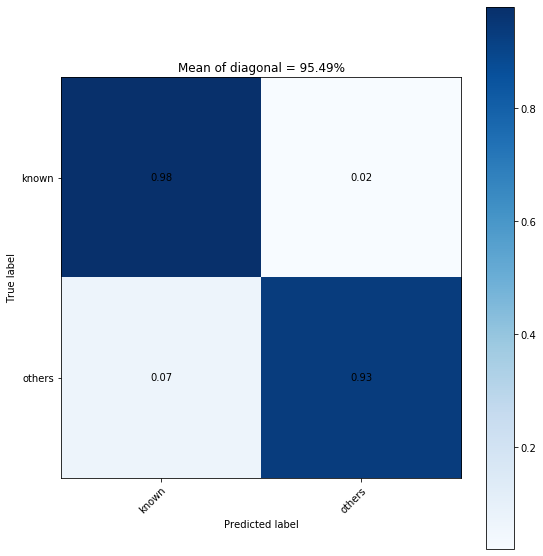

In [42]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
show_hog_res(val_labels_hog2, hog_balanced, ax, ["known", "others"])
fig.tight_layout()

In [56]:
save(hog_balanced,'hog_balanced')

hog_balanced saved


## Hog 600:150

In [43]:
training_set_hog3 = training_set

train_labels_hog3 = ['known'] * (len(train_images_waldo) + len(train_images_wenda) + len(train_images_wizard))
train_labels_hog3.extend(['others'] * len(train_images_others))

val_labels_hog3 = ['known'] * (len(val_images_waldo) + len(val_images_wenda) + len(val_images_wizard))
val_labels_hog3.extend(['others'] * len(val_images_others))

In [44]:
hog_imbalanced = train_hog(training_set_hog3, train_labels_hog3)

[INFO] training classifier...
[INFO] evaluating...


Average Accuracy: 97.31%


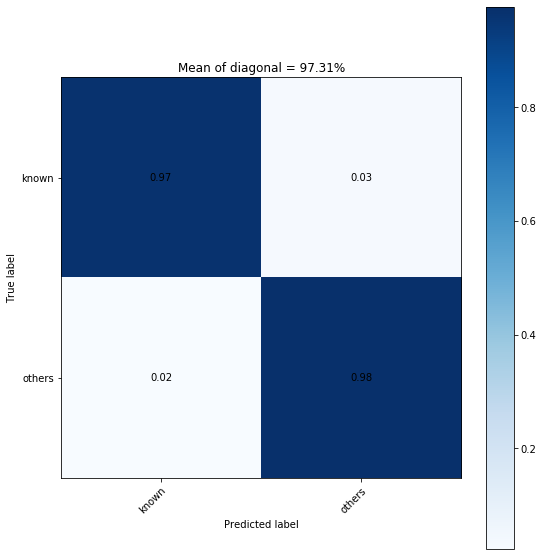

In [45]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
show_hog_res(val_labels_hog3, hog_imbalanced, ax, ["known", "others"])
fig.tight_layout()

In [48]:
save(hog_imbalanced, "hog_imbalanced")

hog_imbalanced saved


### Filter

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg

def plot(image_id, bboxes):
    fig, ax = plt.subplots(figsize=(20,16))
    ax.axis('off')
    img = mpimg.imread('datasets/JPEGImages/{}.jpg'.format(image_id))
    im = ax.imshow(img)

    for box in bboxes:
        y_min, y_max, x_min, x_max = box
        bbox = ax.add_patch(Rectangle((x_min,y_min),x_max-x_min,y_max-y_min, linewidth=1,
                                  edgecolor='r', facecolor='none'))

In [ ]:
from image_generator import filter_candidate

start_time = time.time()
fcandidates, fcandidates_pos = filter_candidate(candidates, candidates_pos, model)
print("filter: {0}".format(time.time()-start_time))

In [ ]:
plot(image_id, fcandidates_pos)

In [ ]:
vocab_filename = "vocab/vocab_waldo_200.pkl"

train_image_feats = bags_of_sifts_spm(training_set_waldo, vocab_filename, 3)
svm_waldo = SVC(gamma="scale", decision_function_shape='ovo', probability=True, kernel="linear")
svm_waldo.fit(train_image_feats, train_labels_waldo)

In [ ]:
vocab_filename = "vocab/vocab_wenda_500.pkl"

train_image_feats = bags_of_sifts_spm(training_set_wenda, vocab_filename, 3)
svm_wenda = SVC(gamma="scale", decision_function_shape='ovo', probability=True, kernel="linear")
svm_wenda.fit(train_image_feats, train_labels_wenda)

In [ ]:
vocab_filename = "vocab/vocab_wizard_200.pkl"

train_image_feats = bags_of_sifts_spm(training_set_wizard, vocab_filename, 3)
svm_wizard = SVC(gamma="scale", decision_function_shape='ovo', probability=True, kernel="linear")
svm_wizard.fit(train_image_feats, train_labels_wizard)

### Generate Others

In [ ]:
## write to file
with open('waldo.txt', 'w') as f:
    for item in waldo_list:
        f.write("%s\n" % item)

with open('wenda.txt', 'w') as f:
    for item in wenda_list:
        f.write("%s\n" % item)

with open('wizard.txt', 'w') as f:
    for item in wizard_list:
        f.write("%s\n" % item)

In [ ]:
## generate others randomly
import imageio

for t, img in enumerate(train_images):
    for id in range(10):
        h = int(round(img.shape[0] * 0.015))
        x = np.random.randint(h, img.shape[0]-h)
        y = np.random.randint(h, img.shape[1]-h)
       
        imageio.imwrite('training_set/others/{}.jpg'.format(t*10 + id), img[x:x+h-1, y:y+h-1])

In [74]:
def get_image(image_id: str):
    directory = "datasets/JPEGImages"

    img = mpimg.imread(join(directory, '{}.jpg'.format(image_id)))

    targets = ['waldo', 'wizard', 'wenda']
    image_map = {}
    for target in targets:
        annos = get_annotation(image_id, target=target)

        images = []
        for anno in annos:
            images.append(img[anno[1]:anno[3], anno[0]:anno[2]])
        image_map[target] = images

    return image_map

In [85]:
def generate_train_images():
    train_image_ids, val_image_ids = get_train_val()

    train_images = {"waldo": [], "wenda": [], "wizard": []}
    for image_id in val_image_ids:
        image_map = get_image(image_id)
        for target in image_map:
            for image in image_map[target]:
                train_images[target].append(image)

    return train_images

images = generate_train_images()

In [89]:
import matplotlib

for i, image in enumerate(images["waldo"]):
    matplotlib.image.imsave('validation_set_color/waldo/{}.jpg'.format(i), image)